# Big-Mart Sales Data

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./Train.csv')
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [3]:
train.shape

(8523, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Exploratory Data Analysis

### Univariate Analysis

#### Target Variable

Text(0.5,1,'Item Outlet Sales')

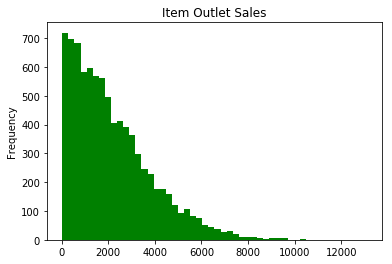

In [5]:
train['Item_Outlet_Sales'].plot(kind='hist', bins=50, color='green').set_title('Item Outlet Sales')

The target is highly right skewed and would need to be transformed before modelling.

Text(0.5,1,'Item Outlet Sales')

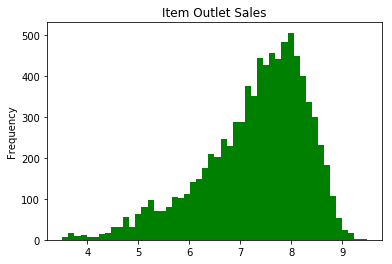

In [6]:
# Lets try looking at the log as a target option
train['Item_Outlet_Sales'].agg(np.log).plot(kind='hist', bins=50, color='green').set_title('Item Outlet Sales')

In [7]:
# Lets save this a log outlet sales to be used as out target
train['Log_Outlet_Sales'] = train['Item_Outlet_Sales'].agg(np.log)

#### Feature Variables

Text(0.5,1,'Item MRP')

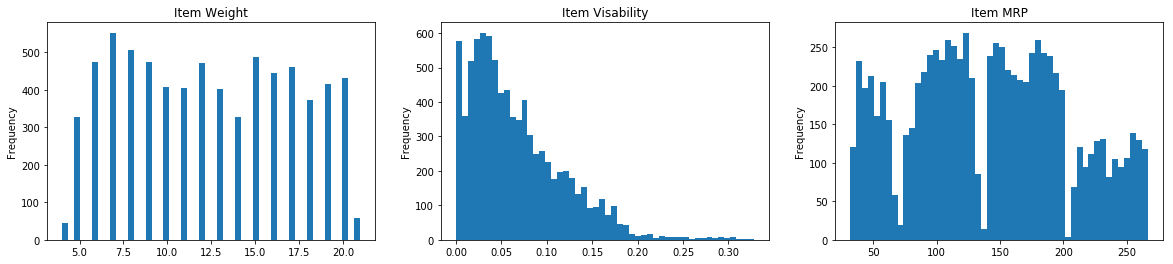

In [8]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
train['Item_Weight'].dropna().astype(int).plot(kind='hist', ax=ax[0], bins=50).set_title('Item Weight')
train['Item_Visibility'].plot(kind='hist', ax=ax[1], bins=50).set_title('Item Visability')
train['Item_MRP'].plot(kind='hist', ax=ax[2], bins=50).set_title('Item MRP')

The Item Visability column is highly right skewed and would need to be transformed beofre modelling.

In [9]:
# Note there are a number of mis-labelled categories
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
# Correcting mis-labelled categories
train['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)
train['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)
train['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Text(0.5,1,'Item Type')

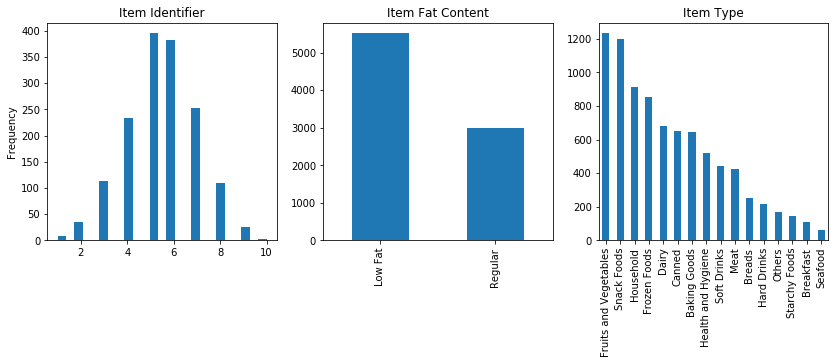

In [12]:
fig, ax = plt.subplots(1,3, figsize=(14,4))
train['Item_Identifier'].value_counts().plot(kind='hist', bins=25, ax=ax[0]).set_title('Item Identifier')
train['Item_Fat_Content'].value_counts().plot(kind='bar', ax=ax[1]).set_title('Item Fat Content')
train['Item_Type'].value_counts().plot(kind='bar', ax=ax[2]).set_title('Item Type')

Text(0.5,1,'Outlet Establishment Year')

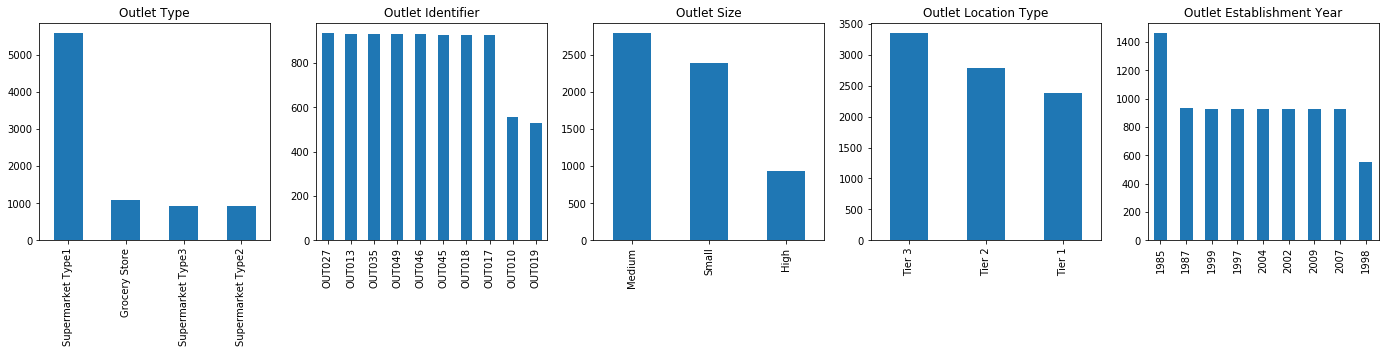

In [13]:
fig, ax = plt.subplots(1,5, figsize=(24,4))
train['Outlet_Type'].value_counts().plot(kind='bar', ax=ax[0]).set_title('Outlet Type')
train['Outlet_Identifier'].value_counts().plot(kind='bar', ax=ax[1]).set_title('Outlet Identifier')
train['Outlet_Size'].value_counts().plot(kind='bar', ax=ax[2]).set_title('Outlet Size')
train['Outlet_Location_Type'].value_counts().plot(kind='bar', ax=ax[3]).set_title('Outlet Location Type')
train['Outlet_Establishment_Year'].value_counts().plot(kind='bar', ax=ax[4]).set_title('Outlet Establishment Year')

### Bivariate Analysis

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Log_Outlet_Sales             8523 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 865.7+ KB


Text(0.5,1,'Item MRP versus Item Sales')

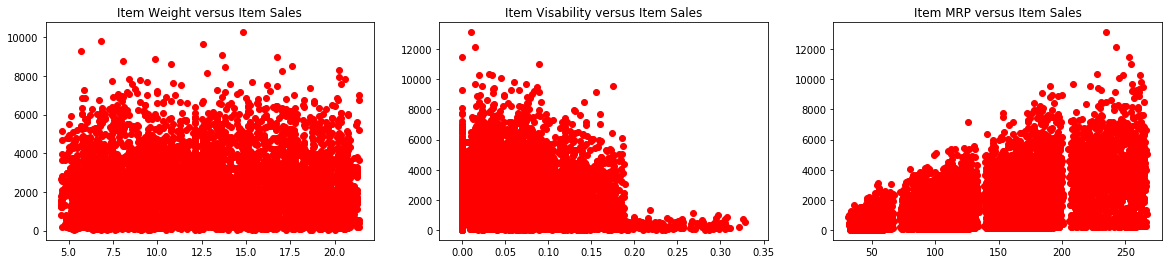

In [15]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
ax[0].scatter(train['Item_Weight'], train['Item_Outlet_Sales'], c='red')
ax[0].set_title('Item Weight versus Item Sales')
ax[1].scatter(train['Item_Visibility'], train['Item_Outlet_Sales'], c='red')
ax[1].set_title('Item Visability versus Item Sales')
ax[2].scatter(train['Item_MRP'], train['Item_Outlet_Sales'], c='red')
ax[2].set_title('Item MRP versus Item Sales')

* Item Weight versus Sales is spread out with no obvious pattern.
* Item Visability seems to have sales at zero visability which seems strange and would need to be investigated.
* Item MRP seems to have four clear categories which could be used for feature engineering.

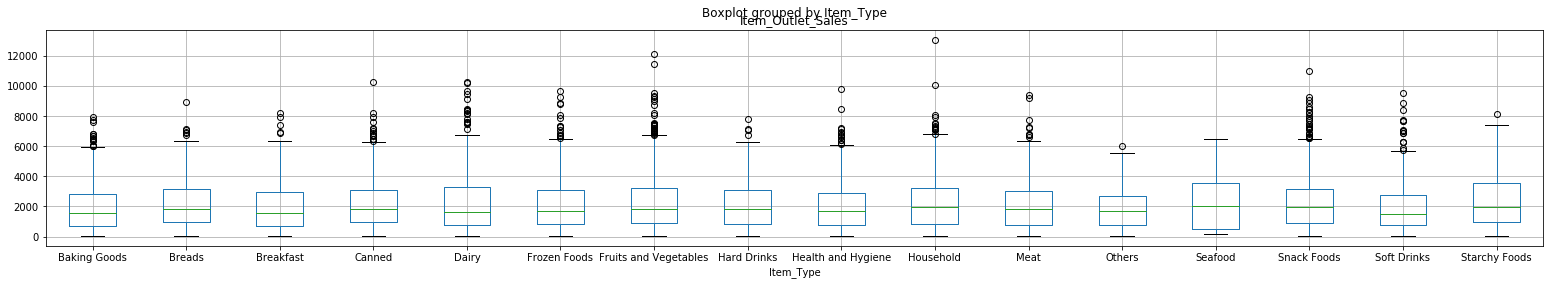

In [16]:
train.boxplot('Item_Outlet_Sales', 'Item_Type', figsize=(26,4))

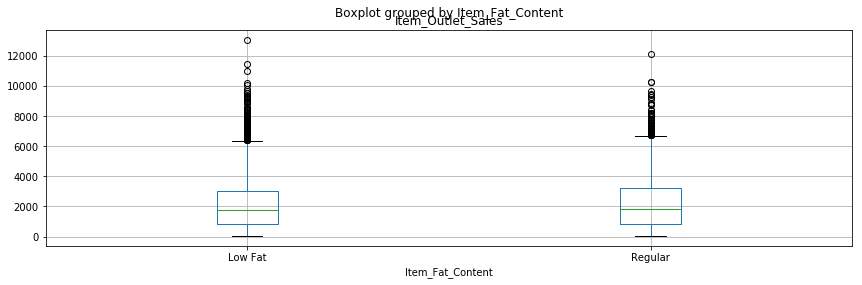

In [17]:
train.boxplot('Item_Outlet_Sales', 'Item_Fat_Content', figsize=(14,4))

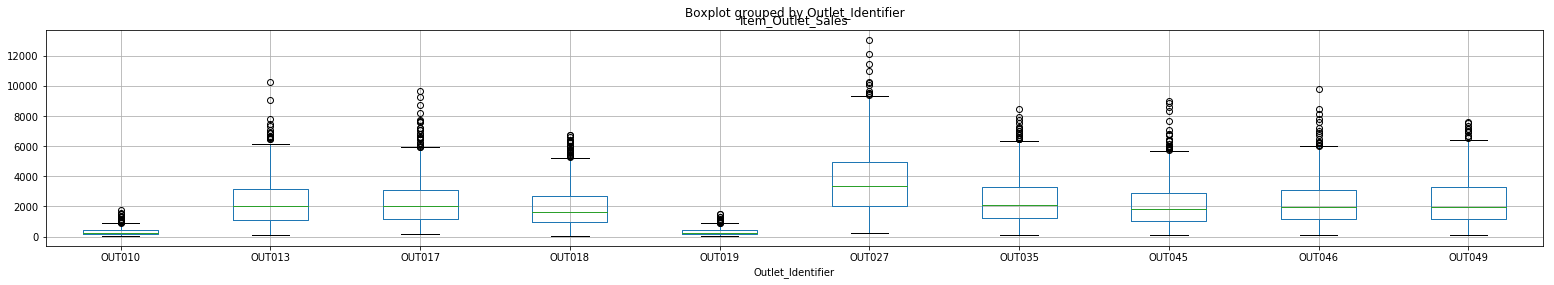

In [18]:
train.boxplot('Item_Outlet_Sales', 'Outlet_Identifier', figsize=(26,4))

* Outlet 10 and 19 are very similar with low sales, where as outlet 27 has the largest sales with the remainder of outlets being very similar

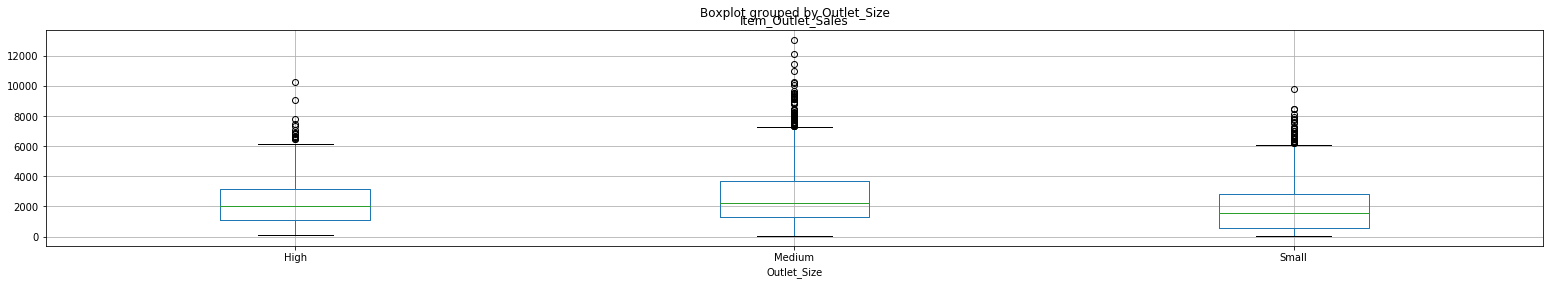

In [19]:
train.boxplot('Item_Outlet_Sales', 'Outlet_Size', figsize=(26,4))

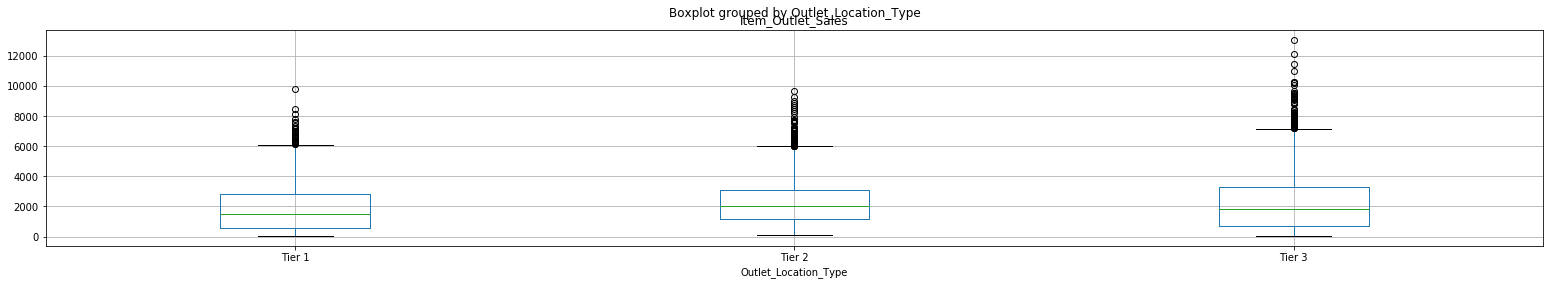

In [20]:
train.boxplot('Item_Outlet_Sales', 'Outlet_Location_Type', figsize=(26,4))

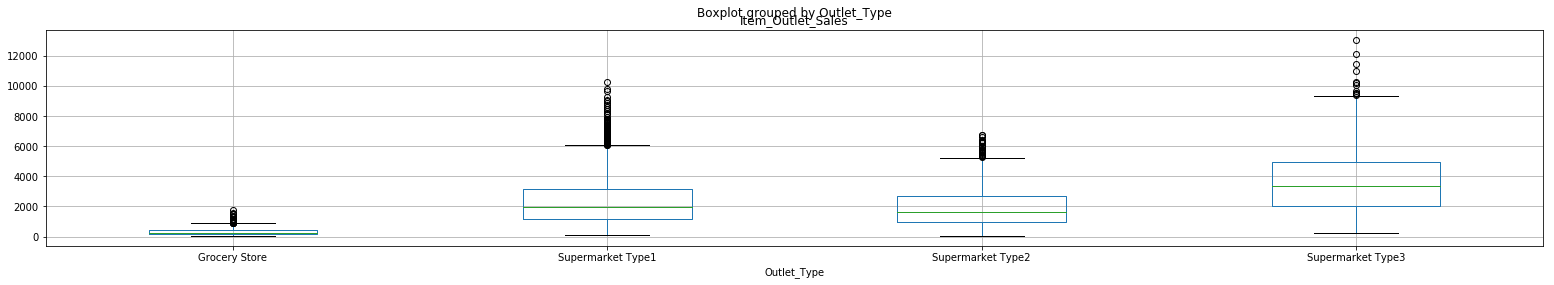

In [21]:
train.boxplot('Item_Outlet_Sales', 'Outlet_Type', figsize=(26,4))

## Missing Value Treatment

In [22]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Log_Outlet_Sales                0
dtype: int64

In [23]:
# For the item weight I will imput the mean item weight from the Item Identifiers.
item_weight_dict = train.groupby(['Item_Identifier']).mean()['Item_Weight'].to_dict()
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Identifier'].map(item_weight_dict))

In [24]:
train[train["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Log_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,7.358803
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,8.397109
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,8.147145
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,4.791731


In [25]:
# As there are still null values I will use the mean from the item type to impute the missing data.
item_type_dict = dict(train.groupby(['Item_Type']).mean()['Item_Weight'])
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Type'].map(item_type_dict))

In [26]:
train['Item_Weight'].isnull().sum()

0

In [27]:
# There are three outlets with unknown size
train[train['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

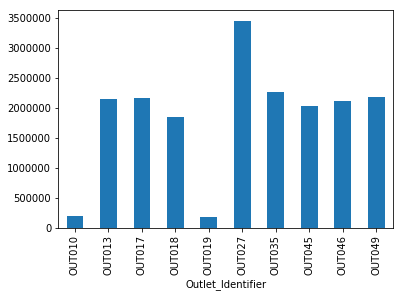

In [28]:
# Graphing Outlet Identifier against Item Sales to try an estimate the unknown outlet sizes by total sales
train.groupby(['Outlet_Identifier']).sum()['Item_Outlet_Sales'].plot(kind='bar')

In [29]:
# Its hard to judge by total sales what constitutes a small, medium or high store size
dict(zip(train['Outlet_Identifier'], train['Outlet_Size']))

{'OUT049': 'Medium',
 'OUT018': 'Medium',
 'OUT010': nan,
 'OUT013': 'High',
 'OUT027': 'Medium',
 'OUT045': nan,
 'OUT017': nan,
 'OUT046': 'Small',
 'OUT035': 'Small',
 'OUT019': 'Small'}

In [30]:
dict(zip(train['Outlet_Identifier'], train['Outlet_Type']))

{'OUT049': 'Supermarket Type1',
 'OUT018': 'Supermarket Type2',
 'OUT010': 'Grocery Store',
 'OUT013': 'Supermarket Type1',
 'OUT027': 'Supermarket Type3',
 'OUT045': 'Supermarket Type1',
 'OUT017': 'Supermarket Type1',
 'OUT046': 'Supermarket Type1',
 'OUT035': 'Supermarket Type1',
 'OUT019': 'Grocery Store'}

* I will assume as Oulet 10 is a Grocery Store it is considered small and will impute Small as outlet size
* I will also assume as Outlet 45 and 17 have similar sales and are the same type the are closest to Medium outlet size

In [31]:
outlet_size = {'OUT010':'Small','OUT045':'Medium','OUT017':'Medium'}
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Identifier'].map(outlet_size))

In [32]:
train.isnull().sum().sum()

0

In [33]:
# I will change the items will zero viability to to the visability of other items
visability = dict(zip(train['Item_Identifier'], train['Item_Visibility']))
train['Item_Visibility'].replace(0, train['Item_Identifier'].map(visability), inplace=True)

In [34]:
train[train['Item_Identifier'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Log_Outlet_Sales


## Feature Engineering

In [35]:
# Creating an Item Code column from the fist two items in the identifier column
train['Item_Code'] = train['Item_Identifier'].str[0:2]
# Creating an Item Letter from the last three items in the identifier column
train['Item_Letter'] = train['Item_Identifier'].str[-3:-2]
# Creating an Item number from the last three items in the identifier column
train['Item_Number'] = train['Item_Identifier'].str[-2:]
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Log_Outlet_Sales,Item_Code,Item_Letter,Item_Number
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,8.225540,FD,A,15
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,6.094524,DR,C,01
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,7.648392,FD,N,15


In [36]:
# Creating a feature for perishable goods (1:highly perisable, 2:perisable, 3:non-perishable)
perishable_goods = {
    
    'Fruits and Vegetables': 1,
    'Snack Foods': 2,
    'Household': 3,
    'Frozen Foods': 2,
    'Dairy': 1,
    'Canned': 3,
    'Baking Goods': 2,
    'Health and Hygiene': 3,
    'Soft Drinks': 3,
    'Meat': 1,
    'Breads': 1,
    'Hard Drinks': 3,
    'Others': 3,
    'Starchy Foods': 2,
    'Breakfast': 2,
    'Seafood': 1
}

train['Item_Perishability'] = train['Item_Type'].map(perishable_goods)

In [37]:
# For Item MRP as seen before we will use K Means Clustering to cluster into the four distinct clusters seen in the scatter plot.
from sklearn.cluster import KMeans
X = train['Item_MRP'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
train['MRP_Labels'] = kmeans.labels_
train['MRP_Labels'].value_counts()

1    3001
3    2545
0    1548
2    1429
Name: MRP_Labels, dtype: int64

## Preprocessing

In [39]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Log_Outlet_Sales,Item_Code,Item_Letter,Item_Number,Item_Perishability,MRP_Labels
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,8.225540,FD,A,15,1,2
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,6.094524,DR,C,01,3,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,7.648392,FD,N,15,1,1


In [40]:
# Setting our X any y for modelling
X = train.drop(['Item_Outlet_Sales', 'Log_Outlet_Sales'], axis=1)
y = train['Log_Outlet_Sales'].values

In [41]:
# Due to skewness taking the log of Item Visability
X['log_Item_Visibility'] = np.log(X['Item_Visibility']+1)

In [42]:
X.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code,Item_Letter,Item_Number,Item_Perishability,MRP_Labels,log_Item_Visibility
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,A,15,1,2,0.015920
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,DR,C,01,3,0,0.019095
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,N,15,1,1,0.016621


In [43]:
# Dropping the Item_Identifier and the Item MRP as we used these to create other features
X = X.drop(['Item_Identifier', 'Item_Visibility', 'Item_MRP'], axis=1)

In [44]:
# Changing Outlet Establishment Year to a string before encoding
X['Outlet_Establishment_Year'] = X['Outlet_Establishment_Year'].astype(str)

In [45]:
# Using Pandas Get Dummies
X = pd.get_dummies(X, drop_first=True)
X.head(3)

,Item_Weight,Item_Perishability,MRP_Labels,log_Item_Visibility,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Number_51,Item_Number_52,Item_Number_53,Item_Number_54,Item_Number_55,Item_Number_56,Item_Number_57,Item_Number_58,Item_Number_59,Item_Number_60
0,9.30,1,2,0.015920,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,3,0,0.019095,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17.50,1,1,0.016621,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# I will also scale the data before modelling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

## Modelling

I will run the following models with cross validation to estimate how they will perform in a test environment.
* Linear Regression
* RandomForest

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6392, 130)
(6392,)
(2131, 130)
(2131,)


In [51]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### Baseline

In [52]:
np.exp(y).mean()

2181.288913575032

In [60]:
def regression_report(estimator, X_train, X_test, y_train, y_test):
    
    score = cross_val_score(estimator, X_train, y_train, cv=5)
    print('-'*42)
    print(score)
    
    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)
    print('Test Score: ', estimator.score(X_test, y_test))
    
    print('RMSE: ', np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_hat))))

### Linear Regression

In [61]:
lr = LinearRegression()

regression_report(lr, X_train, X_test, y_train, y_test)

------------------------------------------
[0.48758456 0.47417256 0.48525584 0.49147115 0.50639197]
Test Score:  0.4926328638224391
RMSE:  1516.564799394525


### Random Forest Regression

In [63]:
rfr = RandomForestRegressor(n_estimators=30, max_depth=8)

regression_report(rfr, X_train, X_test, y_train, y_test)

------------------------------------------
[0.70918699 0.70238331 0.71262872 0.68198415 0.7265082 ]
Test Score:  0.715603408002905
RMSE:  1097.8353694390541
